# COMP7404 Assignment 3 - Basic Classifiers

In this assignment you will implement the basic classifiers discussed in class. This assignment is based on work by Li-Yi Wei et al. and our textbook Python Machine Learning (2nd Edition).

#Submission

Submit a single uid.ipynb file to moodle before the deadline. Ensure your file can be executed on Google Colab.

# Hand-written Digit Classification

In class we applied different scikit-learn classifers for the Iris data set.

In this assignment, we will apply the same set of classifiers over a different data set: hand-written digits.
Please write down the code for different classifiers, choose their hyper-parameters using a validation set, and compare their performance via an accuracy score on a test set.
Add sections for a discussions of results. Which classifier(s) perform(s) the best and worst, and why? 

The classifiers include:
* perceptron
* logistic regression
* SVM
* decision tree
* random forest
* KNN

The dataset is available as part of scikit learn, as follows.

## Load data

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data # training data
y = digits.target # training label

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


## Visualize data

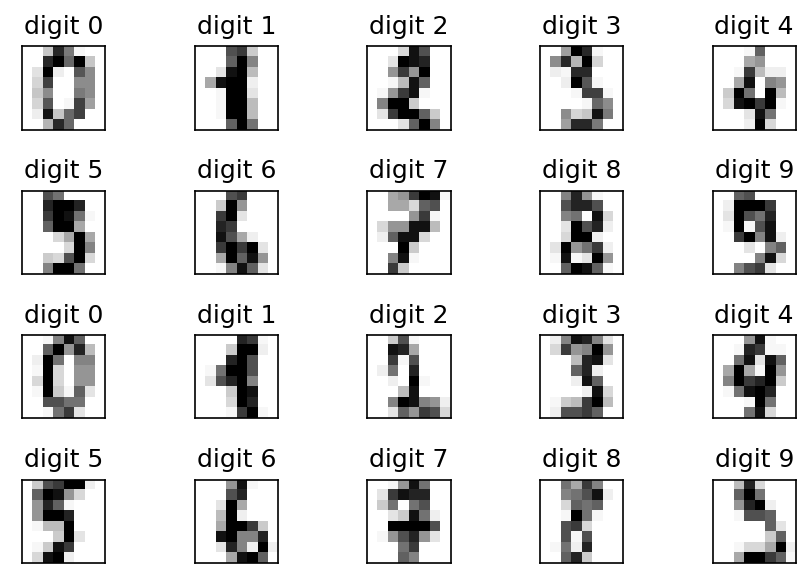

In [2]:
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
num_rows = 4
num_cols = 5
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, sharex=True, sharey=True)
ax = ax.flatten()
for index in range(num_rows*num_cols):
    img = digits.images[index]
    label = digits.target[index]
    ax[index].imshow(img, cmap='Greys', interpolation='nearest')
    ax[index].set_title('digit ' + str(label))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## Date Preprocessing
Hint: Divide training and test data set and apply other techinques we have learned if needed.

In [3]:
#Your code comes here
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(y_test.shape, y_train.shape)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

(540,) (1257,)


## Classifier #1 Perceptron

In [4]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=50, tol=1e-3, eta0=0.01)
ppn.fit(X_train_std, y_train)

print('Train Accuracy: %.2f' % ppn.score(X_train_std, y_train))
print('Test Accuracy: %.2f' % ppn.score(X_test_std, y_test))

Train Accuracy: 0.97
Test Accuracy: 0.94


## Classifier #2 Logistic Regression

In [5]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)

print('Train Accuracy: %.2f' % lr.score(X_train_std, y_train))
print('Test Accuracy: %.2f' % lr.score(X_test_std, y_test))

Train Accuracy: 1.00
Test Accuracy: 0.96


## Classifier #3 SVM

In [6]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1, random_state=1, gamma=0.02)
svm.fit(X_train_std, y_train)

print('Train Accuracy: %.2f' % svm.score(X_train_std, y_train))
print('Test Accuracy: %.2f' % svm.score(X_test_std, y_test))

Train Accuracy: 1.00
Test Accuracy: 0.99


## Classifier #4 Decision Tree

In [7]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=1)
tree.fit(X_train, y_train)

print('Train Accuracy: %.2f' % tree.score(X_train, y_train))
print('Test Accuracy: %.2f' % tree.score(X_test, y_test))

Train Accuracy: 0.94
Test Accuracy: 0.84


## Classifer #5 Random Forest

In [8]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', n_estimators=30, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

print('Train Accuracy: %.2f' % forest.score(X_train, y_train))
print('Test Accuracy: %.2f' % forest.score(X_test, y_test))

Train Accuracy: 1.00
Test Accuracy: 0.97


## Classifier #6 KNN

In [9]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

print('Train Accuracy: %.2f' % knn.score(X_train_std, y_train))
print('Test Accuracy: %.2f' % knn.score(X_test_std, y_test))

Train Accuracy: 0.98
Test Accuracy: 0.99


# Discussion
**SVM** performs best, **Decision Tree** performs worst. 

Our data have 64 dimensions. SVM performs quite well in high dimensional space, and we can even make decision boundary tighter with gamma and change kernel to better fit the classification problem. 

While for Decision Tree, when tree goes deeper, the decision boundary will be more complex, which can easily result to overfitting. The best maximal depth for DT is 8 while the testing accuracy is 10% lower than training, which indicates overfitting.


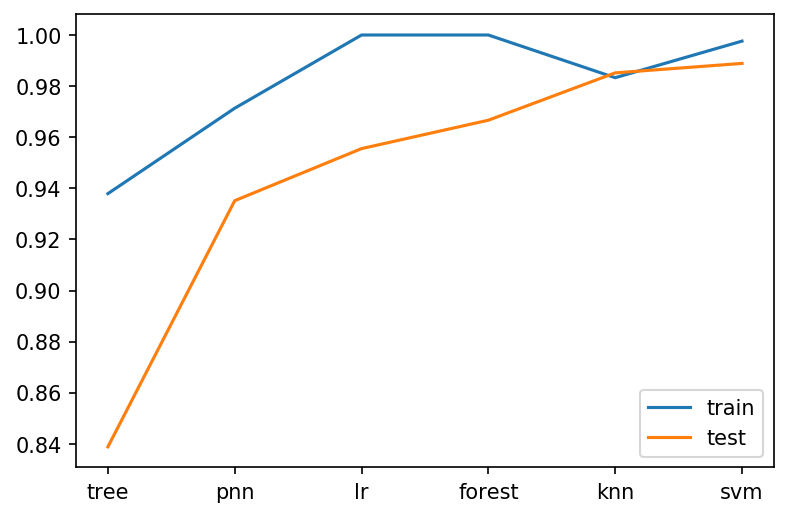

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

scores = [
  {'method': 'pnn', 'train': ppn.score(X_train_std, y_train), 'test': ppn.score(X_test_std, y_test)},
  {'method': 'lr', 'train': lr.score(X_train_std, y_train), 'test': lr.score(X_test_std, y_test)},
  {'method': 'svm', 'train': svm.score(X_train_std, y_train), 'test': svm.score(X_test_std, y_test)},
  {'method': 'knn', 'train': knn.score(X_train_std, y_train), 'test': knn.score(X_test_std, y_test)},
  {'method': 'tree', 'train': tree.score(X_train, y_train), 'test': tree.score(X_test, y_test)},
  {'method': 'forest', 'train': forest.score(X_train, y_train), 'test': forest.score(X_test, y_test)},
]

df = pd.DataFrame(scores).sort_values(by='test')

plt.plot(df['method'], df['train'], label='train')
plt.plot(df['method'], df['test'], label='test')
plt.legend(loc='lower right')
plt.show()